## Image Recognition - CIFAR-10 Dataset and Convolutional Neural Networks

Author: Greg Strabel

This notebook builds a convolutional neural network for classification of the images in the CIFAR-10 dataset. The keras model is based on the example found [here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).

In [16]:
import numpy as np
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

num_classes = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

The 10 classes in the CIFAR-10 dataset:




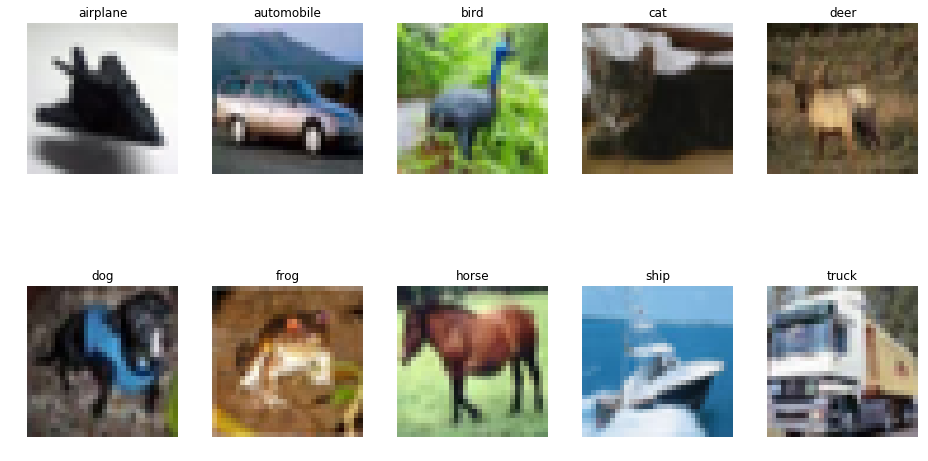

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
print('The 10 classes in the CIFAR-10 dataset:\n\n')
fig, axes = plt.subplots(ncols=5,nrows=2,figsize = (13,8))

for i in range(10):
    idx = np.argmax(y_train[:,i])
    ax = axes.ravel()[i]
    ax.imshow(x_train[idx]/255.)
    ax.axis('off')
    ax.set_title(labels[i])
plt.tight_layout()

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=x_train[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [34]:
model.fit(x_train/255.,
          y_train,
          batch_size = 100,
          epochs = 1,
          verbose = 1,
          validation_data = (x_test/255.,y_test)
         )

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 91s - loss: 1.4047 - acc: 0.4976 - val_loss: 1.2499 - val_acc: 0.5468


In [52]:
from sklearn import metrics
cnn_pred = model.predict_classes(x_test)

print("\n\n\nClassification Report for Convolutional Neural Network Classifier: \n%s\n"
      % (metrics.classification_report(np.argmax(y_test, axis = 1), cnn_pred, target_names = labels)))

 9984/10000 [============================>.] - ETA: 0s


Classification Report for Convolutional Neural Network Classifier: 
             precision    recall  f1-score   support

   airplane       0.15      0.88      0.25      1000
 automobile       0.67      0.70      0.68      1000
       bird       0.65      0.01      0.02      1000
        cat       0.00      0.00      0.00      1000
       deer       0.72      0.01      0.03      1000
        dog       0.40      0.34      0.37      1000
       frog       0.87      0.08      0.15      1000
      horse       0.50      0.45      0.47      1000
       ship       0.77      0.41      0.53      1000
      truck       0.70      0.42      0.52      1000

avg / total       0.54      0.33      0.30     10000




C:\Users\Gregory\Anaconda2\envs\python35\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
import os
cwd = os.getcwd()

# Save the model
model.save(cwd + '\\CIFAR10KerasModel.h5')